# LeNet5 Model | AI Art


In [15]:
from keras.layers import Dense, Dropout, AveragePooling2D, Convolution2D, InputLayer, Flatten
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [16]:
model_name = "lenet5_dense_model_ai_art"
dataset_base_path = "./datasets/AI art"

# Forcefully train the model
force_model_train = True

# Don't save the model
no_save = False

In [17]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

Model/history not found.


In [18]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            InputLayer((32, 32, 3)),

            Convolution2D(12, (5, 5), activation="tanh"),
            AveragePooling2D((2, 2)),

            Convolution2D(32, (5, 5), activation="tanh"),
            AveragePooling2D((2, 2)),

            Convolution2D(240, (5, 5), activation="tanh"),

            Flatten(),

            Dense(1024, activation="tanh"),
            Dense(2, activation="softmax"),
        ]
    )

In [19]:
# Model summary
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 12)        912       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 12)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 32)        9632      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 32)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 240)         192240    
                                                                 
 flatten_2 (Flatten)         (None, 240)              

In [20]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 17307 images belonging to 2 classes.
Found 4328 images belonging to 2 classes.


In [21]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history=history.history

Epoch 1/10
1731/1731 [==============================] - 257s 148ms/step - loss: 0.4759 - accuracy: 0.8225 - val_loss: 0.4789 - val_accuracy: 0.8253
Epoch 2/10
1731/1731 [==============================] - 252s 146ms/step - loss: 0.4701 - accuracy: 0.8222 - val_loss: 0.4626 - val_accuracy: 0.8253
Epoch 3/10
1731/1731 [==============================] - 257s 149ms/step - loss: 0.4650 - accuracy: 0.8237 - val_loss: 0.4478 - val_accuracy: 0.8253
Epoch 4/10
1731/1731 [==============================] - 255s 148ms/step - loss: 0.4856 - accuracy: 0.8236 - val_loss: 0.5741 - val_accuracy: 0.8253
Epoch 5/10
1731/1731 [==============================] - 254s 147ms/step - loss: 0.4930 - accuracy: 0.8241 - val_loss: 0.4740 - val_accuracy: 0.8253
Epoch 6/10
1731/1731 [==============================] - 256s 148ms/step - loss: 0.4893 - accuracy: 0.8249 - val_loss: 0.5555 - val_accuracy: 0.8253
Epoch 7/10
1731/1731 [==============================] - 256s 148ms/step - loss: 0.4887 - accuracy: 0.8247 - val_

In [22]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/lenet5_dense_model_ai_art/model\assets


INFO:tensorflow:Assets written to: ./models/lenet5_dense_model_ai_art/model\assets


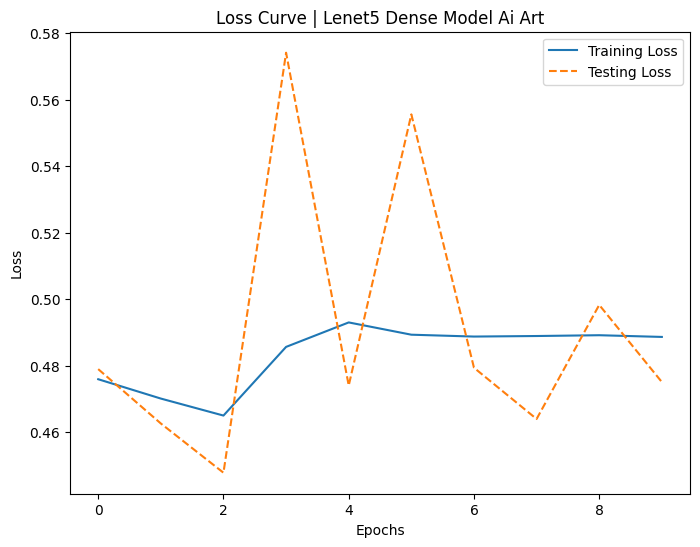

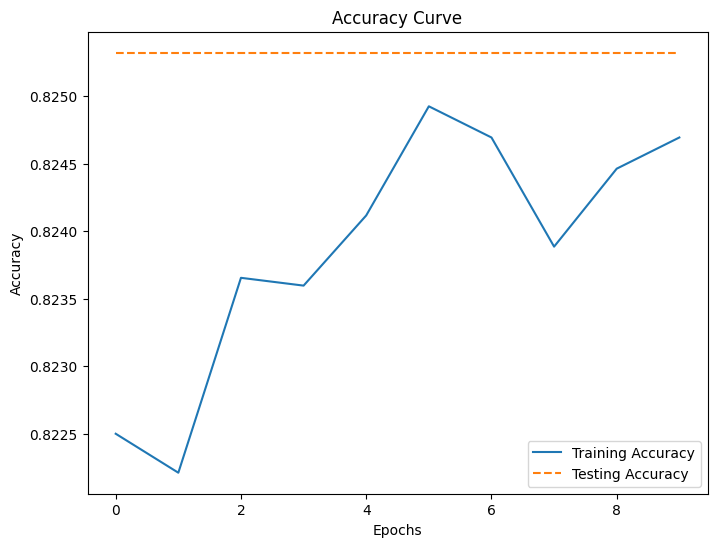

In [23]:
# Plot performance curves
plot_performance_curves(history, model_name)